In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Semester 5/ML/Real estate.csv")

####Pre-processing of the data

In [206]:
df.info()
df = df.drop("No",axis = 1) #Removing the index of one of the data points
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1



####Normalize data and convert into code



In [4]:
import numpy as np

shuffled_df = df.sample(frac = 1, random_state = 50)
npd = np.array(shuffled_df, dtype=float)

for i in range(npd.shape[1]):
    npd[:,i] = npd[:,i] - np.mean(npd[:,i])
    npd[:,i] = (1.0 * npd[:,i] )/ np.std(npd[:,i])

train_df = npd[:331]
test_df = npd[331:]

####Segregate the data into feature and output set (x and y set)

In [9]:
import matplotlib.pyplot as plt
train_x_npd = train_df[:,:6]
train_y_npd = train_df[:,6]

####Reshape the matrix so that you can multiply them later.

In [10]:
x_npd = np.hstack((np.ones((train_x_npd.shape[0],1)), train_x_npd))
y_npd = np.reshape(train_y_npd, (331,1))
#Split the data set

####Creating gradient descent function on training x


In [11]:
lr = 0.000001
iteration = 1000000
b = 0
w_parameter = np.zeros((x_npd.shape[1], 1))
while (iteration > 0):
    m_matrix = np.matmul(x_npd, w_parameter) #prediction of x
    b = (1/x_npd.shape[0])*(x_npd.T@(m_matrix - y_npd))
    # b = (1/x_npd.shape[0])*(np.dot(x_npd.T,(m_matrix - y_npd)))
    w_parameter = w_parameter - (lr)*b
    iteration -= 1

####Testing

In [12]:
test_x_npd = test_df[:,:6]
test_y_npd = test_df[:,6]
predicted_y = []
test_y_npd.shape[0]

for i in range(test_y_npd.shape[0]):
    y = w_parameter[0] + w_parameter[1]*test_x_npd[i][0] + w_parameter[2]*test_x_npd[i][1] + w_parameter[3]*test_x_npd[i][2] + w_parameter[4]*test_x_npd[i][3] + w_parameter[5]*test_x_npd[i][4] + w_parameter[6]*test_x_npd[i][5]
    predicted_y.append(y)

print(predicted_y)
MSE = (np.square(np.subtract(test_y_npd,predicted_y))).mean()
print(np.sqrt(MSE))
print(MSE)

[array([-0.25344807]), array([-0.82447832]), array([0.35952485]), array([0.88161382]), array([0.00290924]), array([0.26721074]), array([0.4725461]), array([-0.71827377]), array([0.37248025]), array([0.02901238]), array([0.54039258]), array([0.64285998]), array([0.39317352]), array([-0.04526165]), array([0.59529815]), array([-0.03970157]), array([0.14256577]), array([-1.63150109]), array([0.17229449]), array([0.28965197]), array([0.60161387]), array([0.15574425]), array([-0.24546824]), array([-0.62649296]), array([0.05989354]), array([-0.24626118]), array([-0.6136494]), array([0.5893768]), array([-0.64659909]), array([0.7858619]), array([0.36166644]), array([-0.30615878]), array([-0.74351758]), array([-0.60661721]), array([-0.02364621]), array([-1.48597654]), array([0.08748588]), array([0.20293455]), array([-0.07047838]), array([-0.02960444]), array([-0.88865378]), array([0.68730655]), array([0.38302456]), array([-0.40289064]), array([0.0357851]), array([0.46547419]), array([-0.00575718

####K-fold Cross validation function

In [39]:
shuffled_df = df.sample(frac = 1, random_state = 50)
def kfold(df,k):
    #The function would shuffle the data and would spit out the array
    #Shuffled the data and get the resultant value
    # shuffled_df = df.sample(frac = 1, random_state = 50)
    npd = np.array(df, dtype=float)

    for i in range(npd.shape[1]):
        npd[:,i] = npd[:,i] - np.mean(npd[:,i])
        npd[:,i] = (1.0 * npd[:,i] )/ np.std(npd[:,i])
    
    k_npd = np.array_split(npd, k,axis = 0)
    return k_npd

def train(k_npd,k):
    RMSE_k = []
    for i in range(k): #loop to get test set
        ktest = k_npd[i]
        if (i == 0):
            ktrain = k_npd[1]
            for j in range(2, k-1):
                ktrain = np.vstack((ktrain, k_npd[j]))
        else:
            ktrain = k_npd[0]
            for j in range(1, k):
                if (i == j):
                    continue
                ktrain = np.vstack((ktrain, k_npd[j]))
    
        #Using ktrain and ktest we will get two values

        train_x_npd = ktrain[:,:6]
        train_y_npd = ktrain[:,6]
        test_x_npd = ktest[:,:6]
        test_y_npd = ktest[:,6]

        x_npd = np.hstack((np.ones((train_x_npd.shape[0],1)), train_x_npd))
        y_npd = np.reshape(train_y_npd, (train_y_npd.shape[0],1))
        iteration = 10000
        lr = 0.0000001
        w_parameter = np.zeros((x_npd.shape[1], 1))
        while (iteration > 0):
            
            m_matrix = np.matmul(x_npd, w_parameter) #prediction of x
            b = (1/x_npd.shape[0])*(x_npd.T@(m_matrix - y_npd))
            # b = (1/x_npd.shape[0])*(np.dot(x_npd.T,(m_matrix - y_npd)))
            w_parameter = w_parameter - (lr)*b
            
            iteration -= 1
        
        predicted_y = []
        test_y_npd.shape[0]

        for i in range(test_y_npd.shape[0]):
            y = w_parameter[0] + w_parameter[1]*test_x_npd[i][0] + w_parameter[2]*test_x_npd[i][1] + w_parameter[3]*test_x_npd[i][2] + w_parameter[4]*test_x_npd[i][3] + w_parameter[5]*test_x_npd[i][4] + w_parameter[6]*test_x_npd[i][5]
            predicted_y.append(y)

        MSE = (np.square(np.subtract(test_y_npd,predicted_y))).mean()
        RMSE_k.append(np.sqrt(MSE))
        
    averageRMSE = sum(RMSE_k) / len(RMSE_k)
    return averageRMSE

In [40]:
RMSEKvalues = []
for i in range(2,6):
    print(i)
    RMSEKvalues.append(train(kfold(df,i),i))

print(RMSEKvalues)

2
3
4
5
[0.9998987246976098, 0.9981552916379686, 0.9987034234285421, 0.996382364479538]


####Part 2 : K-fold cross validation  + iteration graph

In [202]:
import numpy as np
shuffled_df = df.sample(frac = 1, random_state = 50)
def kfold(df,k):
    #The function would shuffle the data and would spit out the array
    #Shuffled the data and get the resultant value
    # shuffled_df = df.sample(frac = 1, random_state = 50)
    npd = np.array(df, dtype=float)
    for i in range(npd.shape[1]):
        npd[:,i] = npd[:,i] - np.mean(npd[:,i])
        npd[:,i] = (1.0 * npd[:,i] )/ np.std(npd[:,i])
    
    k_npd = np.array_split(npd, k,axis = 0)
    # print(k_npd[0])
    print(len(k_npd))
    return k_npd

def test(w_parameter,x_npd,test_y_npd):
    prediction_ans = np.dot(x_npd,w_parameter)
    MSE = (np.square(np.subtract(test_y_npd,prediction_ans))).mean()
    return np.sqrt(MSE)


def train(k_npd,k):
    RMSE_k = []
    MSE_outer = 0
    for i in range(k): #loop to get test set
        ktest = k_npd[i]
        if (i == 0):
            ktrain = k_npd[1]
            for j in range(2, k-1):
                ktrain = np.vstack((ktrain, k_npd[j]))
        else:
            ktrain = k_npd[0]
            for j in range(1, k):
                if (i == j):
                    continue
                ktrain = np.vstack((ktrain, k_npd[j]))
    
        #Using ktrain and ktest we will get two values

        train_x_npd = ktrain[:,:6]
        train_y_npd = ktrain[:,6]
        test_x_npd = ktest[:,:6]
        test_y_npd = ktest[:,6]
        # print(ktrain[0])
        # print(train_x_npd.shape)
        # print(train_y_npd)
        x_npd = np.hstack((np.ones((train_x_npd.shape[0],1)), train_x_npd))
        # print(x_npd.shape)
        test_x_npd = np.hstack((np.ones((test_x_npd.shape[0],1)), test_x_npd))
        y_npd = np.reshape(train_y_npd, (train_y_npd.shape[0],1))
        test_y_npd = np.reshape(test_y_npd, (test_y_npd.shape[0],1))
        # print(y_npd)
        iteration = 10000
        lr = 0.01
        MSE_i = []
        MSE_b = []
        iterations_count = []
        w_parameter = np.zeros((x_npd.shape[1], 1))
        # print(w_parameter)
        while (iteration > 0):
            iterations_count.append(10000 - iteration)
            m_matrix = np.dot(x_npd, w_parameter) #prediction of x
            # print(x_npd.shape)
            # print(w_parameter.shape)
            prediction_ans = np.dot(x_npd,w_parameter)
            MSE = np.sum((np.square(np.subtract(y_npd,prediction_ans))))/len(y_npd)
            MSE_i.append(np.sqrt(MSE))
            # b = (1/x_npd.shape[0])*(x_npd.T@(m_matrix - y_npd))
            b = (1/x_npd.shape[0])*(np.dot(x_npd.T,(m_matrix - y_npd)))
            w_parameter = w_parameter - (lr)*b 
            # print(iterations_MSE)
            
            MSE_b.append(test(w_parameter,test_x_npd,test_y_npd))
            iteration -= 1
        
        MSE_outer += np.sum(MSE_b) / len(MSE_b)
        # MSE = (np.square(np.subtract(test_y_npd,predicted_y))).mean()
        # RMSE_k.append(np.sqrt(MSE))
        
    # averageRMSE = sum(RMSE_k) / len(RMSE_k)
    # return averageRMSE,MSE_i,iterations_count
    return MSE_outer/k,MSE_i,MSE_b

In [203]:
averageRMSE,MSE_i,MSE_b = train(kfold(shuffled_df,5),5) #Since 5 is the optimum value
print(averageRMSE)
print(MSE_i)

# kfold(shuffled_df,5)
# print(iterations_count)
# print(averageRMSE)
# print(len(MSE_i))

5
0.6482208330304002
[1.0151549298072746, 1.000858191580397, 0.9871218162477094, 0.9739276924634073, 0.9612580715176694, 0.9490955660732691, 0.937423149417923, 0.9262241551456141, 0.9154822771795068, 0.9051815700495891, 0.8953064493397848, 0.885841692221963, 0.8767724379979297, 0.8680841885750378, 0.8597628088063959, 0.8517945266326571, 0.8441659329689019, 0.8368639812870603, 0.8298759868515097, 0.8231896255727912, 0.8167929324517029, 0.8106742995932061, 0.8048224737765349, 0.7992265535745219, 0.7938759860213671, 0.7887605628338181, 0.783870416195941, 0.7791960141223211, 0.7747281554185974, 0.7704579642617201, 0.7663768844252139, 0.7624766731770477, 0.7587493948794891, 0.7551874143215697, 0.7517833898155593, 0.7485302660891753, 0.7454212670051824, 0.7424498881396132, 0.7396098892491042, 0.7368952866568498, 0.7343003455854559, 0.7318195724635799, 0.7294477072317082, 0.7271797156707829, 0.7250107817756787, 0.7229363001937776, 0.7209518687471222, 0.7190532810548667, 0.717236519271011, 0.7

[1.0151549298072746, 1.000858191580397, 0.9871218162477094, 0.9739276924634073, 0.9612580715176694, 0.9490955660732691, 0.937423149417923, 0.9262241551456141, 0.9154822771795068, 0.9051815700495891, 0.8953064493397848, 0.885841692221963, 0.8767724379979297, 0.8680841885750378, 0.8597628088063959, 0.8517945266326571, 0.8441659329689019, 0.8368639812870603, 0.8298759868515097, 0.8231896255727912, 0.8167929324517029, 0.8106742995932061, 0.8048224737765349, 0.7992265535745219, 0.7938759860213671, 0.7887605628338181, 0.783870416195941, 0.7791960141223211, 0.7747281554185974, 0.7704579642617201, 0.7663768844252139, 0.7624766731770477, 0.7587493948794891, 0.7551874143215697, 0.7517833898155593, 0.7485302660891753, 0.7454212670051824, 0.7424498881396132, 0.7396098892491042, 0.7368952866568498, 0.7343003455854559, 0.7318195724635799, 0.7294477072317082, 0.7271797156707829, 0.7250107817756787, 0.7229363001937776, 0.7209518687471222, 0.7190532810548667, 0.717236519271011, 0.7154977469507119, 0.71

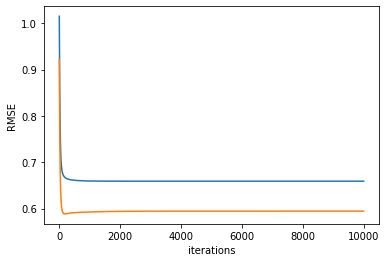

In [204]:
import matplotlib.pyplot as plt
iterations_count = [] 
for i in range(0,10000):
    iterations_count.append(i)
plt.xlabel('iterations')
plt.ylabel('RMSE')
print(MSE_i)
plt.plot(iterations_count,MSE_i)
plt.plot(iterations_count,MSE_b)
plt.show()

####L1 Lasso Regression

In [219]:
import numpy as np
shuffled_df = df.sample(frac = 1, random_state = 50)
def kfold(df,k):
    #The function would shuffle the data and would spit out the array
    #Shuffled the data and get the resultant value
    # shuffled_df = df.sample(frac = 1, random_state = 50)
    npd = np.array(df, dtype=float)
    for i in range(npd.shape[1]):
        npd[:,i] = npd[:,i] - np.mean(npd[:,i])
        npd[:,i] = (1.0 * npd[:,i] )/ np.std(npd[:,i])
    
    k_npd = np.array_split(npd, k,axis = 0)
    # print(k_npd[0])
    print(len(k_npd))
    return k_npd

def test(w_parameter,x_npd,test_y_npd):
    prediction_ans = np.dot(x_npd,w_parameter)
    MSE = (np.square(np.subtract(test_y_npd,prediction_ans))).mean()
    return np.sqrt(MSE)


def train(k_npd,k,a):
    RMSE_k = []
    MSE_outer = 0
    for i in range(k): #loop to get test set
        ktest = k_npd[i]
        if (i == 0):
            ktrain = k_npd[1]
            for j in range(2, k-1):
                ktrain = np.vstack((ktrain, k_npd[j]))
        else:
            ktrain = k_npd[0]
            for j in range(1, k):
                if (i == j):
                    continue
                ktrain = np.vstack((ktrain, k_npd[j]))
    
        #Using ktrain and ktest we will get two values

        train_x_npd = ktrain[:,:6]
        train_y_npd = ktrain[:,6]
        test_x_npd = ktest[:,:6]
        test_y_npd = ktest[:,6]
 
        x_npd = np.hstack((np.ones((train_x_npd.shape[0],1)), train_x_npd))
        test_x_npd = np.hstack((np.ones((test_x_npd.shape[0],1)), test_x_npd))
        y_npd = np.reshape(train_y_npd, (train_y_npd.shape[0],1))
        test_y_npd = np.reshape(test_y_npd, (test_y_npd.shape[0],1))
        iteration = 10000
        lr = 0.01
        MSE_i = []
        MSE_b = []
        iterations_count = []
        w_parameter = np.zeros((x_npd.shape[1], 1))
        while (iteration > 0):
            iterations_count.append(10000 - iteration)
            m_matrix = np.dot(x_npd, w_parameter)
            prediction_ans = np.dot(x_npd,w_parameter)
            MSE = np.sum((np.square(np.subtract(y_npd,prediction_ans))))/len(y_npd)
            MSE_i.append(np.sqrt(MSE))
            lasso = (2/x_npd.shape[0])*np.dot(x_npd.T,m_matrix - y_npd) + a*np.absolute(w_parameter)
            w_parameter = w_parameter - (lr)*lasso
            
            MSE_b.append(test(w_parameter,test_x_npd,test_y_npd))
            iteration -= 1
        
        MSE_outer += np.sum(MSE_b) / len(MSE_b)
        
    return MSE_outer/k,MSE_i,MSE_b

In [220]:
averageRMSE,MSE_i,MSE_b = train(kfold(df,5),5,0.01) #Since 5 is the optimum value
print(averageRMSE)

5
0.6404440313953217


[1.0242309017540516, 0.9950759052641199, 0.9682006914774877, 0.943457300473558, 0.9207037820321913, 0.8998041873069729, 0.8806285828816423, 0.8630530751282661, 0.8469598336037468, 0.8322371035682913, 0.8187791994564213, 0.8064864731249879, 0.7952652527854444, 0.7850277505533088, 0.7756919383952076, 0.7671813938348482, 0.7594251180407973, 0.7523573298415565, 0.7459172398060137, 0.7400488088201502, 0.7347004956281225, 0.7298249976387424, 0.7253789889794366, 0.7213228593583491, 0.7176204568148824, 0.7142388369356905, 0.7111480206151433, 0.7083207619672448, 0.7057323275637721, 0.7033602877892882, 0.7011843207713039, 0.6991860290635616, 0.6973487690299457, 0.6956574926921706, 0.6940986016613996, 0.6926598126671804, 0.6913300341213503, 0.690099253104875, 0.6889584321373252, 0.6878994150777094, 0.6869148415080317, 0.68599806896407, 0.6851431023988299, 0.6843445302907039, 0.6835974668387321, 0.6828974997200773, 0.6822406429187079, 0.6816232941684485, 0.6810421965873015, 0.6804944041127673, 0.6

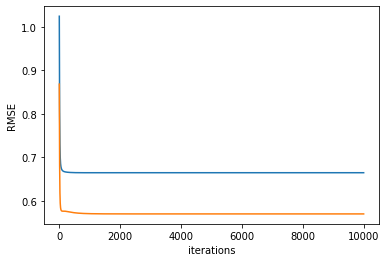

In [221]:
import matplotlib.pyplot as plt
plt.xlabel('iterations')
plt.ylabel('RMSE')
print(MSE_i)
iterations_count = []
for i in range(0,10000):
    iterations_count.append(i)

plt.plot(iterations_count,MSE_i)
plt.plot(iterations_count,MSE_b)

plt.show()

####L2 Ridge Regression

In [235]:
import numpy as np
shuffled_df = df.sample(frac = 1, random_state = 50)
def kfold(df,k):
    #The function would shuffle the data and would spit out the array
    #Shuffled the data and get the resultant value
    # shuffled_df = df.sample(frac = 1, random_state = 50)
    npd = np.array(df, dtype=float)
    for i in range(npd.shape[1]):
        npd[:,i] = npd[:,i] - np.mean(npd[:,i])
        npd[:,i] = (1.0 * npd[:,i] )/ np.std(npd[:,i])
    
    k_npd = np.array_split(npd, k,axis = 0)
    # print(k_npd[0])
    print(len(k_npd))
    return k_npd

def test(w_parameter,x_npd,test_y_npd):
    prediction_ans = np.dot(x_npd,w_parameter)
    MSE = (np.square(np.subtract(test_y_npd,prediction_ans))).mean()
    return np.sqrt(MSE)


def train(k_npd,k,a):
    RMSE_k = []
    MSE_outer = 0
    for i in range(k): #loop to get test set
        ktest = k_npd[i]
        if (i == 0):
            ktrain = k_npd[1]
            for j in range(2, k-1):
                ktrain = np.vstack((ktrain, k_npd[j]))
        else:
            ktrain = k_npd[0]
            for j in range(1, k):
                if (i == j):
                    continue
                ktrain = np.vstack((ktrain, k_npd[j]))
    
        #Using ktrain and ktest we will get two values

        train_x_npd = ktrain[:,:6]
        train_y_npd = ktrain[:,6]
        test_x_npd = ktest[:,:6]
        test_y_npd = ktest[:,6]
 
        x_npd = np.hstack((np.ones((train_x_npd.shape[0],1)), train_x_npd))
        test_x_npd = np.hstack((np.ones((test_x_npd.shape[0],1)), test_x_npd))
        y_npd = np.reshape(train_y_npd, (train_y_npd.shape[0],1))
        test_y_npd = np.reshape(test_y_npd, (test_y_npd.shape[0],1))
        iteration = 10000
        lr = 0.01
        MSE_i = []
        MSE_b = []
        iterations_count = []
        w_parameter = np.zeros((x_npd.shape[1], 1))
        while (iteration > 0):
            iterations_count.append(10000 - iteration)
            m_matrix = np.dot(x_npd, w_parameter)
            prediction_ans = np.dot(x_npd,w_parameter)
            MSE = np.sum((np.square(np.subtract(y_npd,prediction_ans))))/len(y_npd)
            ridge = (2/x_npd.shape[0])*np.dot(x_npd.T,m_matrix - y_npd) + 2*a*w_parameter
            MSE_i.append(np.sqrt(MSE))
            w_parameter = w_parameter - (lr)*ridge
            
            MSE_b.append(test(w_parameter,test_x_npd,test_y_npd))
            iteration -= 1
        
        MSE_outer += np.sum(MSE_b) / len(MSE_b)
        
    return MSE_outer/k,MSE_i,MSE_b

In [233]:
averageRMSE,MSE_i,MSE_b = train(kfold(df,5),5,0.01)

5


[1.0242309017540516, 0.9950759052641199, 0.9682054499633176, 0.9434707003405703, 0.9207289125912383, 0.8998434248051822, 0.8806836690778348, 0.8631251933704287, 0.8470496818135719, 0.8323449635441461, 0.8189050019558646, 0.8066298582727183, 0.7954256254620717, 0.7852043305437197, 0.7758838052022823, 0.7673875261859987, 0.7596444282243776, 0.7525886931029588, 0.7461595191066609, 0.7403008753159567, 0.7349612452581232, 0.7300933642313602, 0.7256539542857715, 0.7216034604117857, 0.717905790997011, 0.7145280651027206, 0.7114403686089842, 0.7086155208032155, 0.7060288525540893, 0.703657996829258, 0.701482691984428, 0.6994845979731255, 0.6976471253984751, 0.6959552771465757, 0.6943955022007159, 0.6929555611314968, 0.6916244026846425, 0.690392050840849, 0.6892495016958304, 0.6881886294995736, 0.6872021011980867, 0.6862832988354859, 0.6854262491964497, 0.6846255600967017, 0.6838763627604536, 0.6831742597572049, 0.6825152780048249, 0.6818958263805248, 0.6813126575155175, 0.6807628333823332, 0.6

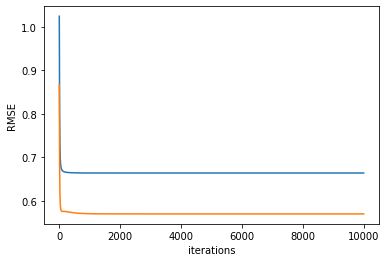

In [234]:
import matplotlib.pyplot as plt
plt.xlabel('iterations')
plt.ylabel('RMSE')
print(MSE_i)
iterations_count = []
for i in range(0,10000):
    iterations_count.append(i)

plt.plot(iterations_count,MSE_i)
plt.plot(iterations_count,MSE_b)

plt.show()

####Normal Equation and Table for RMS on respective validation set

In [51]:
shuffled_df = df.sample(frac = 1, random_state = 50)
def kfold(df,k):
    #The function would shuffle the data and would spit out the array
    #Shuffled the data and get the resultant value
    # shuffled_df = df.sample(frac = 1, random_state = 50)
    npd = np.array(df, dtype=float)

    for i in range(npd.shape[1]):
        npd[:,i] = npd[:,i] - np.mean(npd[:,i])
        npd[:,i] = (1.0 * npd[:,i] )/ np.std(npd[:,i])
    
    k_npd = np.array_split(npd, k,axis = 0)
    return k_npd

def train(k_npd,k):
    RMSE_k = []
    for i in range(k): #loop to get test set
        ktest = k_npd[i]
        if (i == 0):
            ktrain = k_npd[1]
            for j in range(2, k-1):
                ktrain = np.vstack((ktrain, k_npd[j]))
        else:
            ktrain = k_npd[0]
            for j in range(1, k):
                if (i == j):
                    continue
                ktrain = np.vstack((ktrain, k_npd[j]))
    
        #Using ktrain and ktest we will get two values

        train_x_npd = ktrain[:,:6]
        train_y_npd = ktrain[:,6]
        test_x_npd = ktest[:,:6]
        test_y_npd = ktest[:,6]

        x_npd = np.hstack((np.ones((train_x_npd.shape[0],1)), train_x_npd))
        y_npd = np.reshape(train_y_npd, (train_y_npd.shape[0],1))
        
        
        predicted_y = []
        w_parameter = np.linalg.inv(train_x_npd.T.dot(train_x_npd)).dot(train_x_npd.T).dot(train_y_npd)
        
        for i in range(test_y_npd.shape[0]):
            y = w_parameter[0] + w_parameter[1]*test_x_npd[i][0] + w_parameter[2]*test_x_npd[i][1] + w_parameter[3]*test_x_npd[i][2] + w_parameter[4]*test_x_npd[i][3] + w_parameter[5]*test_x_npd[i][4]
            predicted_y.append(y)

        
        MSE = (np.square(np.subtract(test_y_npd,predicted_y))).mean()
        RMSE_k.append(np.sqrt(MSE))
        
    averageRMSE = sum(RMSE_k) / len(RMSE_k)
    return averageRMSE,RMSE_k

In [52]:
averageRMSE,RMSE_k = train(kfold(df,5),5)
RMSE_k

[1.045289278556397,
 1.0738903617321636,
 1.1330584321885546,
 1.259860933441022,
 1.0302762014828666]